# Stock Market Prediction using Numerical and Textual Analysis

## Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

# Objective:

Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

# DataSet

Download historical stock prices from finance.yahoo.com And 
Download textual (news) data from https://bit.ly/36fFPI6

# Importing Libraries

In [194]:
import warnings
warnings.filterwarnings('ignore')
import math
import pandas as pd
import numpy as np
# For time stamps
from datetime import datetime

!pip install pandas_datareader
from pandas_datareader.data import DataReader

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Importing Google Stock Market Data from 2014 to 2021

In [3]:
end = datetime.now()
start = datetime(end.year - 7, 1, 1)
stock_df = DataReader('GOOG', 'yahoo', start, end)

In [4]:
stock_df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [5]:
stock_df.head()

,high,low,open,close,volume,adjclose
Date,,,,,,
2013-12-31,558.406982,551.064453,554.043335,558.262512,2725979.0,558.262512
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589


In [6]:
stock_df.tail()

,high,low,open,close,volume,adjclose
Date,,,,,,
2021-05-11,2322.000000,2283.000000,2291.860107,2308.760010,1605500.0,2308.760010
2021-05-12,2285.370117,2230.050049,2261.709961,2239.080078,1746700.0,2239.080078
2021-05-13,2276.601074,2242.719971,2261.090088,2261.969971,1333500.0,2261.969971
2021-05-14,2321.139893,2283.320068,2291.830078,2316.159912,1330100.0,2316.159912
2021-05-17,2323.340088,2295.000000,2309.320068,2321.409912,992100.0,2321.409912


In [7]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1857 entries, 2013-12-31 to 2021-05-17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high      1857 non-null   float64
 1   low       1857 non-null   float64
 2   open      1857 non-null   float64
 3   close     1857 non-null   float64
 4   volume    1857 non-null   float64
 5   adjclose  1857 non-null   float64
dtypes: float64(6)
memory usage: 101.6 KB


In [8]:
stock_df.shape

(1857, 6)

In [9]:
stock_df.describe()

,high,low,open,close,volume,adjclose
count,1857.000000,1857.000000,1857.000000,1857.000000,1.857000e+03,1857.000000
mean,1011.103867,992.017622,1001.390705,1001.909486,1.830105e+06,1001.909486
std,411.097734,401.727335,405.638114,406.584719,1.014223e+06,406.584719
min,494.618011,486.225067,493.295654,491.201416,7.922000e+03,491.201416
25%,693.750000,678.599976,685.469971,683.570007,1.252000e+06,683.570007
50%,961.619995,950.690002,957.000000,957.369995,1.549600e+06,957.369995
75%,1206.989990,1189.010010,1197.989990,1200.489990,2.050600e+06,1200.489990
max,2452.377930,2402.280029,2410.330078,2429.889893,1.117433e+07,2429.889893


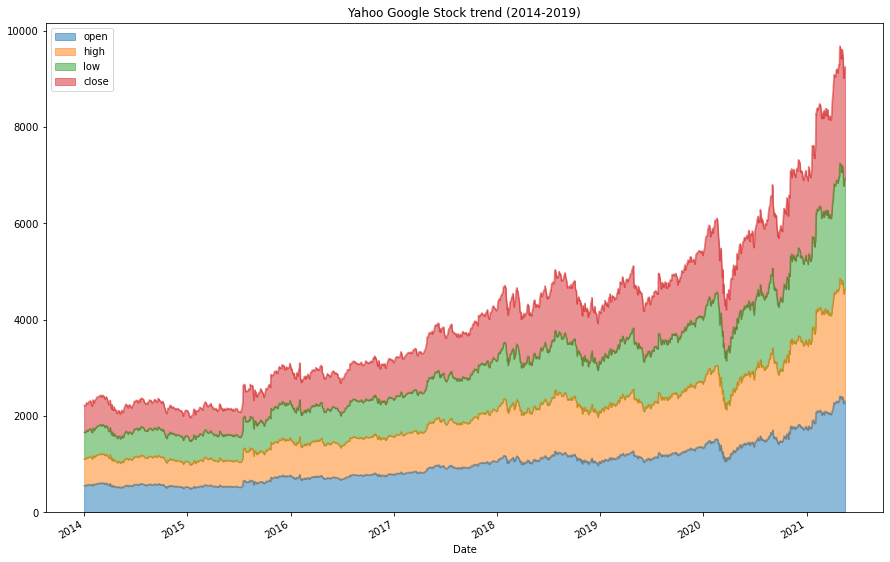

In [10]:
stock_df[["open","high","low","close"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('Yahoo Google Stock trend (2014-2019)')
plt.show()

### Showing Monthly wise changes in market

Date
2013-12-01    554.043335
2014-01-01    567.653006
2014-02-01    592.472688
2014-03-01    593.049302
2014-04-01    542.481091
Freq: MS, Name: open, dtype: float64


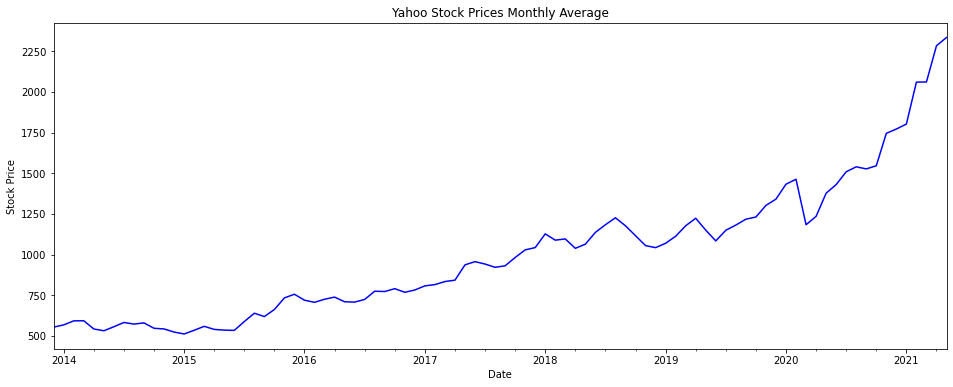

In [11]:
df_open_month_avg = stock_df['open'].resample('MS').mean()
print(df_open_month_avg.head())
plt.figure(figsize=(16,6))

df_open_month_avg.plot(color='b')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices Monthly Average')

plt.show()

### Ploting Seasonal, Trending, Residual of Average opening market

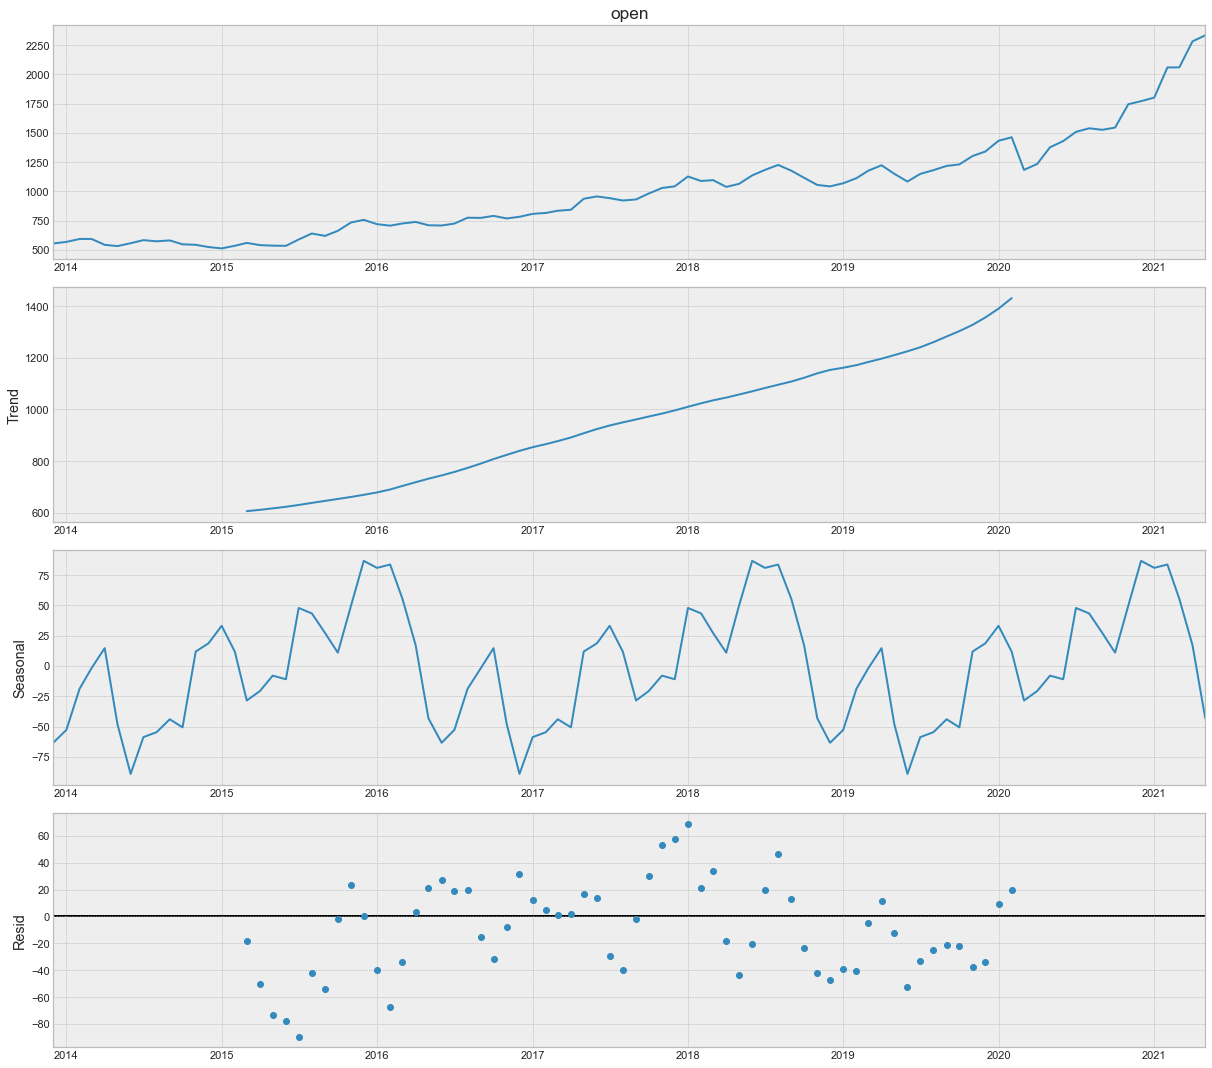

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 17,15
rcParams['lines.color'] = 'teal'


result = seasonal_decompose(df_open_month_avg, model='additive', period=30)
sns.set()

plt.style.use('bmh')
result.plot()

plt.show()

### Ploting AutoCorrelation in opening stocks

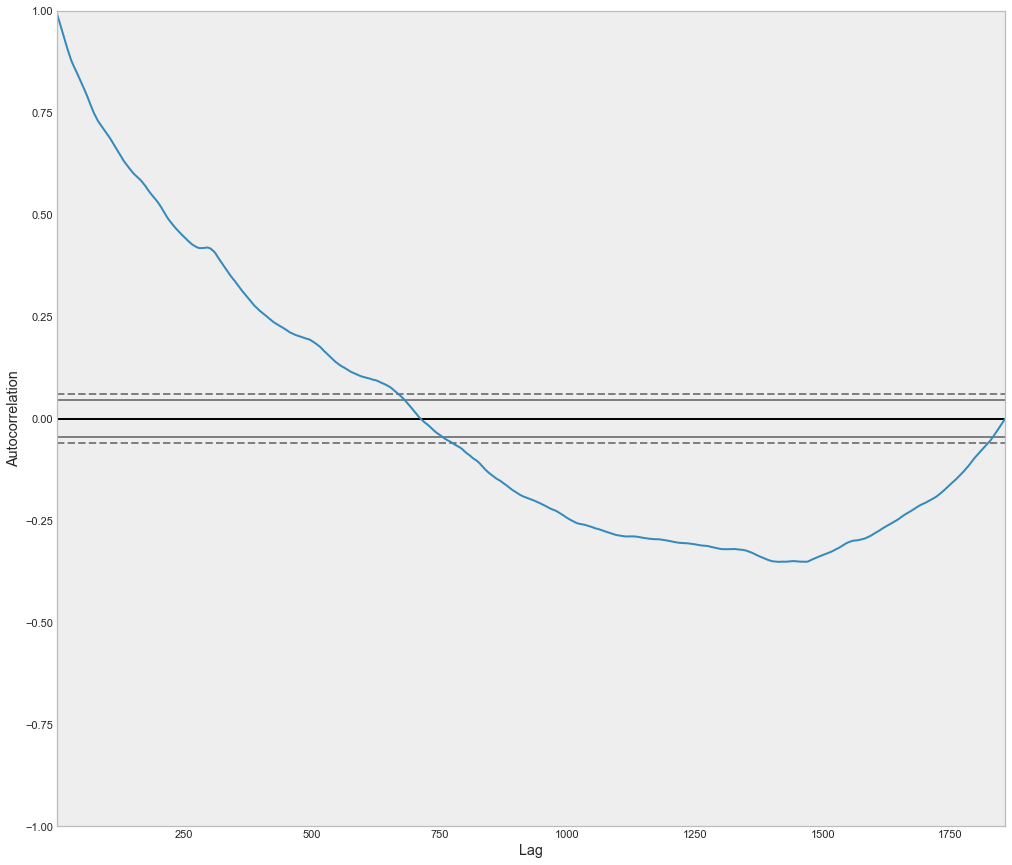

In [13]:
pd.plotting.autocorrelation_plot(stock_df['open'])

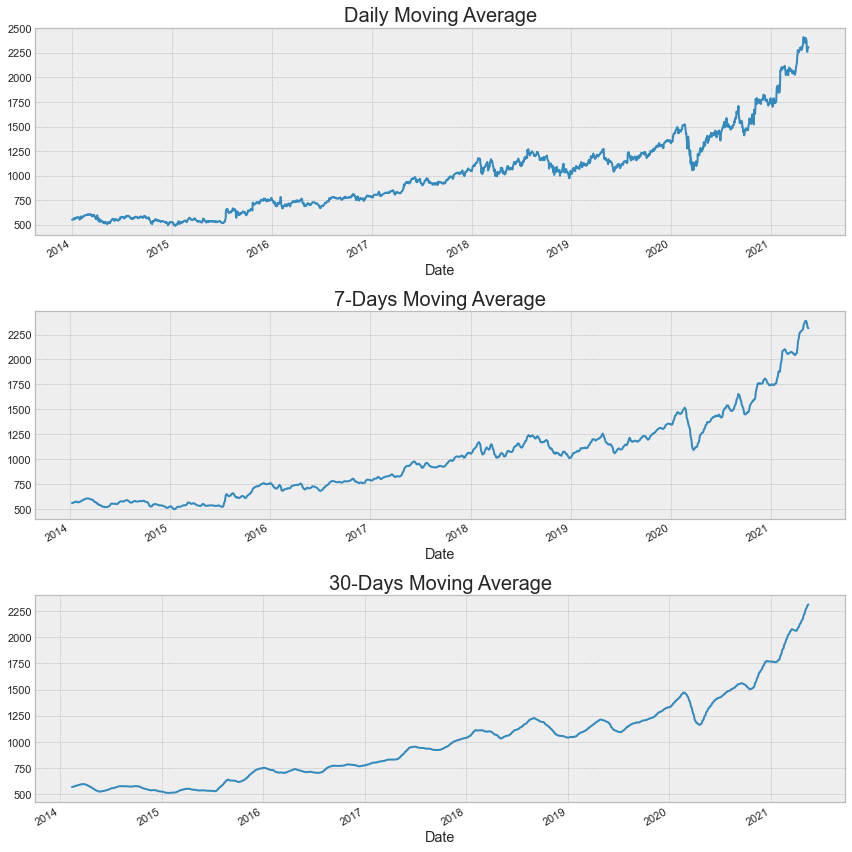

In [14]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(12,12))
stock_df['open'].rolling(window=1).mean().plot(ax=ax[0])
stock_df['open'].rolling(window=7).mean().plot(ax=ax[1])
stock_df['open'].rolling(window=30).mean().plot(ax=ax[2])
ax[0].set_title('Daily Moving Average',fontsize=20)
ax[1].set_title('7-Days Moving Average',fontsize=20)
ax[2].set_title('30-Days Moving Average',fontsize=20)
plt.tight_layout()

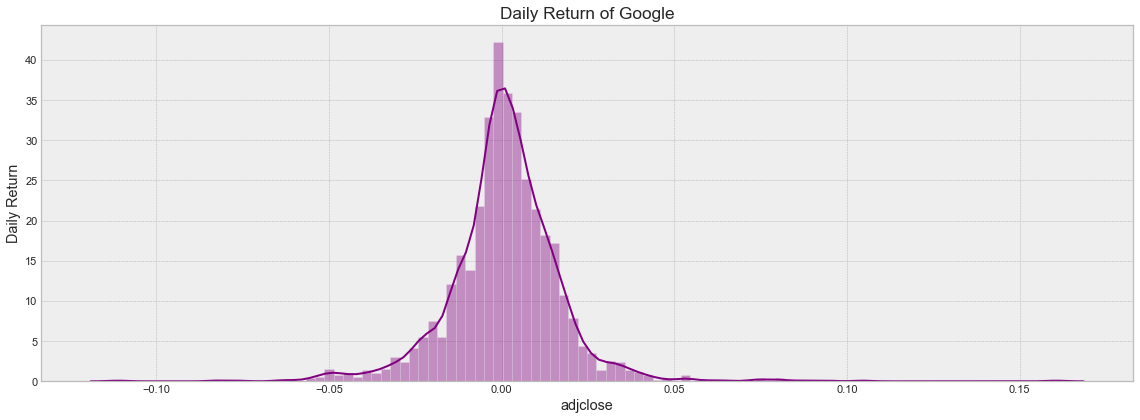

In [15]:
plt.figure(figsize=(16,6))

sns.distplot(stock_df['adjclose'].pct_change().dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title("Daily Return of Google")
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

## Importing Heading Dataset

In [16]:
news  = pd.read_csv('india-news-headlines.csv')

In [17]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [18]:
news.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [19]:
news.shape

(3424067, 3)

In [20]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')

In [21]:
news['headline_category'].value_counts()

india                                           288541
unknown                                         209582
city.mumbai                                     134428
city.delhi                                      127717
business.india-business                         116761
                                                 ...  
scorecard-and-statistics                             8
sports.rio-2016-olympics.news.sailing                8
sports.asian-games-2018                              8
sports.hockey.hockey-india-league.interviews         8
mahindra-cars                                        8
Name: headline_category, Length: 1013, dtype: int64

In [22]:
news['headline_text'].value_counts()

Straight Answers                                                   6723
Cartoons                                                           1536
Straight answers                                                   1500
Photogallery                                                       1353
Your say                                                           1012
                                                                   ... 
Barrage of scams since Commonwealth Games: Advani                     1
BSY in early-budget rush to save gaddi                                1
Burglars break into house; flee with valuables worth Rs 12 lakh       1
Sena's Kagal candidate alleges bogus voting                           1
Lok Sabha polls 2014: MLAs sitting jobless in Andhra Pradesh          1
Name: headline_text, Length: 3168800, dtype: int64

In [23]:
news['headline_text'].value_counts()

Straight Answers                                                   6723
Cartoons                                                           1536
Straight answers                                                   1500
Photogallery                                                       1353
Your say                                                           1012
                                                                   ... 
Barrage of scams since Commonwealth Games: Advani                     1
BSY in early-budget rush to save gaddi                                1
Burglars break into house; flee with valuables worth Rs 12 lakh       1
Sena's Kagal candidate alleges bogus voting                           1
Lok Sabha polls 2014: MLAs sitting jobless in Andhra Pradesh          1
Name: headline_text, Length: 3168800, dtype: int64

In [24]:
news.sort_values(by='publish_date', inplace=True, ignore_index=True)

In [25]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Petition over ministers' assets dismissed
2,2001-01-02,unknown,Bomb hoax triggers panic in Canara Bank
3,2001-01-02,unknown,Consul is back from month-long leave
4,2001-01-02,unknown,Redemption night; amid some rock


In [26]:
news.duplicated(keep=False).sum()

46130

In [27]:
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [28]:
news.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Petition over ministers' assets dismissed
1,2001-01-02,unknown,Bomb hoax triggers panic in Canara Bank
2,2001-01-02,unknown,Consul is back from month-long leave
3,2001-01-02,unknown,Redemption night; amid some rock
4,2001-01-02,unknown,The best music of the year


### Combining the news of same date

In [29]:
lst = news['publish_date'].value_counts().index.tolist()
new = []
for x in lst:
    df = news.loc[news['publish_date'] == x]
    headlinetext = ''
    publishdate = str(x)
    headlinetext = df['headline_text'].iloc[0]
    for i in range(1 , len(df)):
        headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
    new.append(headlinetext)
newsdf = pd.DataFrame({'publish_date': lst, 'headline_text' : new})

In [30]:
newsdf.shape

(7262, 2)

In [31]:
from textblob import TextBlob

## Computing Polarity and Subjectivity of each Headline

In [32]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
    polarity.append(TextBlob(row['headline_text']).sentiment[0])
    subjectivity.append(TextBlob(row['headline_text']).sentiment[1])
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity

In [33]:
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2014-12-15,Australian police say no contact with hostage-...,0.060845,0.403747
1,2014-12-21,A defeat is never dignified; says San Lorenzo ...,0.119356,0.432447
2,2014-12-09,Sandip Ray's debut film was Phatik Chand. Adit...,0.096953,0.462260
3,2014-11-29,Gujarat CM looks to strengthen state economy w...,0.125642,0.408298
4,2014-11-01,Doubtful if new govt will act against scam acc...,0.092497,0.429872


In [34]:
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)

In [35]:
newsdf.sort_values(by='date', inplace=True, ignore_index=True)

In [36]:
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)

In [37]:
newsdf.head()

,date,polarity,subjectivity
0,2001-01-02,0.193519,0.293056
1,2001-01-03,0.088462,0.407692
2,2001-01-04,0.089863,0.481895
3,2001-01-05,0.257415,0.465542
4,2001-01-06,0.219481,0.464935


In [38]:
stock_df = stock_df.reset_index()
stock_df.rename(columns={'Date': 'date'}, inplace = True)

In [39]:
stock_df.head()

,date,high,low,open,close,volume,adjclose
0,2013-12-31,558.406982,551.064453,554.043335,558.262512,2725979.0,558.262512
1,2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689
2,2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829
3,2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853
4,2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589


### Merging Both Datasets

In [40]:
stock = pd.merge(stock_df, newsdf, how='left', on=['date'])

In [41]:
stock.shape

(1857, 9)

In [42]:
stock.head()

,date,high,low,open,close,volume,adjclose,polarity,subjectivity
0,2013-12-31,558.406982,551.064453,554.043335,558.262512,2725979.0,558.262512,0.085131,0.450173
1,2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,0.100212,0.470080
2,2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,0.040121,0.387912
3,2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853,0.061583,0.405417
4,2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589,0.028117,0.414754


In [43]:
stock.tail()

,date,high,low,open,close,volume,adjclose,polarity,subjectivity
1852,2021-05-11,2322.000000,2283.000000,2291.860107,2308.760010,1605500.0,2308.760010,NaN,NaN
1853,2021-05-12,2285.370117,2230.050049,2261.709961,2239.080078,1746700.0,2239.080078,NaN,NaN
1854,2021-05-13,2276.601074,2242.719971,2261.090088,2261.969971,1333500.0,2261.969971,NaN,NaN
1855,2021-05-14,2321.139893,2283.320068,2291.830078,2316.159912,1330100.0,2316.159912,NaN,NaN
1856,2021-05-17,2323.340088,2295.000000,2309.320068,2321.409912,992100.0,2321.409912,NaN,NaN


In [44]:
stock.dropna(inplace=True)

In [45]:
stock.isnull().sum().sum()

0

In [46]:
stock.tail()

,date,high,low,open,close,volume,adjclose,polarity,subjectivity
1759,2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800.0,1738.849976,0.048173,0.390942
1760,2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000.0,1776.089966,0.070784,0.414510
1761,2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400.0,1758.719971,0.060787,0.424021
1762,2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100.0,1739.520020,0.043227,0.441660
1763,2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900.0,1751.880005,0.091149,0.406220


In [47]:
stock.loc[len(stock)] = ['2021-01-01', stock['open'].mean(), stock['high'].mean(), stock['low'].mean(),
                       stock['close'].mean(), stock['adjclose'].mean(), stock['volume'].median(), newsdf['polarity'].mean(), newsdf['subjectivity'].mean() ]

In [48]:
stock['date'] = pd.to_datetime(stock['date'], format="%Y-%m-%d")

## Performing the Feature Engineering 

In [49]:
stock["month"] = stock['date'].dt.month
stock["day"] = stock['date'].dt.day
stock["dayofweek"] = stock['date'].dt.dayofweek
stock["week"] = stock['date'].dt.week
stock['movingavg4weeks'] = round(stock['close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
stock['movingavg16weeks'] = round(stock['close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
stock['movingavg28weeks'] = round(stock['close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
stock['movingavg40weeks'] = round(stock['close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
stock['movingavg52weeks'] = round(stock['close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
stock['window10days'] = round(stock['close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
stock['window50days'] = round(stock['close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
stock['polarity'] = round(stock['polarity'] , 2)
stock['subjectivity'] = round(stock['subjectivity'] , 2)
stock['price'] = round((stock['high'] + stock['low'] + stock['close']) / 3 , 2)

In [50]:
stock['date']=stock['date'].map(datetime.toordinal)

In [51]:
stock.head()

,date,high,low,open,close,volume,adjclose,polarity,subjectivity,month,...,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,price
0,735233,558.406982,551.064453,554.043335,558.262512,2725979.0,558.262512,0.09,0.45,12,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.91
1,735235,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689,0.10,0.47,1,...,3,1,558.26,558.26,558.26,558.26,558.26,558.26,558.26,554.44
2,735236,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829,0.04,0.39,1,...,4,1,556.37,556.37,556.37,556.37,556.37,556.37,556.37,552.41
3,735239,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853,0.06,0.41,1,...,0,2,554.39,554.39,554.39,554.39,554.39,554.39,554.39,555.02
4,735240,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589,0.03,0.41,1,...,1,2,554.94,554.94,554.94,554.94,554.94,554.94,554.94,564.50


In [52]:
stock.fillna(method = 'ffill', inplace = True)
stock.fillna(method = 'bfill', inplace = True)

In [53]:
stock.isna().sum().sum()


0

### Pearson Correlation with each column of dataset

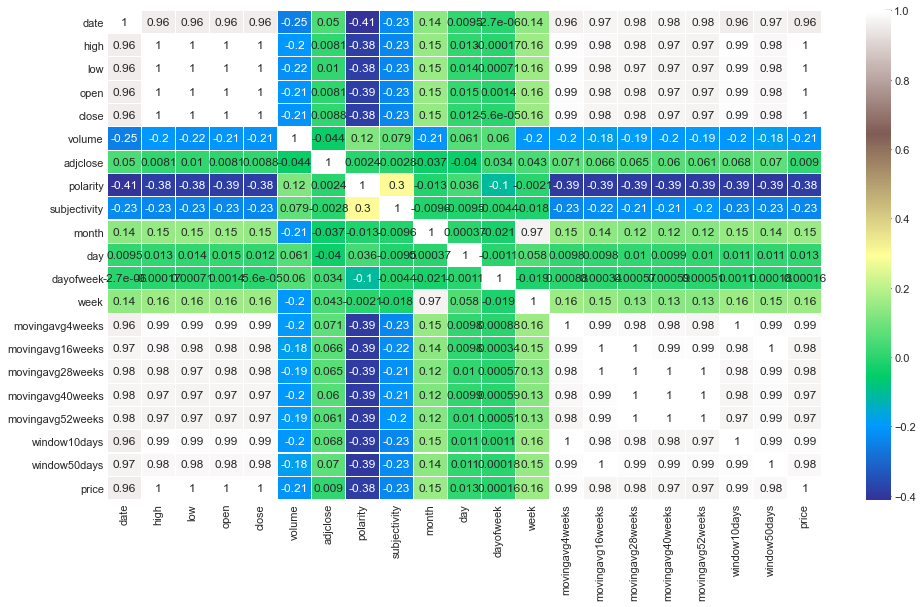

In [54]:
sns.heatmap(stock.corr(method='pearson'),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(16,9)
plt.show()

In [55]:
trainDf = stock.iloc[:-1,:].reset_index()  
testDf = stock.iloc[-1:,:].reset_index()

In [56]:
X = trainDf.drop(['price','close'], axis = 1)
y = trainDf[['price','close']]

testX = testDf.drop(['price','close'], axis = 1)
testy = testDf[['price','close']]

### Splitting the dataset into train and test

In [58]:
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1411, 20), (1411, 2), (353, 20), (353, 2))

### Scaling Each feature

In [59]:
scaler = MinMaxScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
scaled_X_train

array([[0.33427923, 0.33450704, 0.15165956, ..., 0.12252215, 0.16473124,
        0.17228921],
       [0.20431328, 0.20500782, 0.02920487, ..., 0.00302564, 0.02860956,
        0.01562875],
       [0.79909194, 0.79968701, 0.50669163, ..., 0.63569606, 0.52989047,
        0.49987156],
       ...,
       [0.7877412 , 0.78873239, 0.46829474, ..., 0.63460855, 0.46194852,
        0.50214212],
       [0.50964813, 0.50978091, 0.34037272, ..., 0.3053094 , 0.35391483,
        0.35648643],
       [0.66685585, 0.66627543, 0.56116157, ..., 0.56807684, 0.55055378,
        0.55959395]])

## Apply Random Forest Regressor Algorithm

In [61]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse')

In [62]:
chainedmodel = RegressorChain(rfg)

In [63]:
chainedmodel.fit(scaled_X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(n_estimators=500,
                                                    random_state=42))

#### Prediction

In [64]:
pred = chainedmodel.predict(scaled_X_test)
roundpred = []
for x in range(len(pred)):
    roundpred.append([round(pred[x][0], 2),round(pred[x][1], 2)])

#### Computing R2_score

In [65]:
r2_score(y_test, roundpred) 

0.999951338378672

### Evaluation Algorithm

In [66]:
print('MAE')
print(mean_absolute_error(y_test, roundpred), end='\n')
#MSE
print('MSE')
print(mean_squared_error(y_test, roundpred), end='\n')
#RMSE
print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundpred)))

MAE
1.2069518472385163
MSE
5.040315887452129
RMSE
2.2450647846893257


### Prediction on Unseen Dataset

In [67]:
testX = scaler.transform(testX)

In [68]:
pred_test = chainedmodel.predict(testX)

In [69]:
pred_test,testy

(array([[1044.71368   , 1476.88221851]]),
     price      close
 0  947.04  944.30243)

In [70]:
[(round(pred_test[0][0], 2)),(round(testy.iloc[0,0], 2))]

[1044.71, 947.04]

# Applying XG Boosting Algorithm

In [71]:
stockdf = stock.copy()

In [72]:
train_size = int(len(stock)*.9)
del stockdf['price']

In [73]:
train = stockdf.iloc[:train_size,:]
y_train = train.pop('close')
val = stockdf.iloc[train_size:,:]
y_val = val.pop('close')

train.shape, y_train.shape, val.shape, y_val.shape

((1588, 19), (1588,), (177, 19), (177,))

In [74]:
import xgboost as xgb
dxtrain = xgb.DMatrix(train, label=y_train)
dxtest = xgb.DMatrix(val, label=y_val)

xgb_params = {
    'objective': 'reg:linear',  # error evaluation for multiclass training
    'booster':'gbtree',
    'max_depth':5,
    'eta':0.01, 
    'subsample':0.7,
    'colsample_bytree':0.7,
    'lambda':2, 
    'alpha':2,
    'gamma':1
}
xgb_params['eval_metric'] = ['rmse']
num_rounds = 2000
watchlist  = [(dxtrain,'train'), (dxtest,'test')]
model = xgb.train(xgb_params, dxtrain, num_rounds, watchlist, verbose_eval=100, early_stopping_rounds=150)

[15:46:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:907.04962	test-rmse:1539.42761
[100]	train-rmse:337.25687	test-rmse:722.78345
[200]	train-rmse:125.98862	test-rmse:375.21256
[300]	train-rmse:47.35056	test-rmse:234.16745
[400]	train-rmse:18.03676	test-rmse:177.88678
[500]	train-rmse:7.14171	test-rmse:153.36092
[600]	train-rmse:3.14969	test-rmse:141.84050
[700]	train-rmse:1.78453	test-rmse:136.12149
[800]	train-rmse:1.36527	test-rmse:133.50352
[900]	train-rmse:1.20991	test-rmse:132.04790
[1000]	train-rmse:1.12426	test-rmse:131.20044
[1100]	train-rmse:1.06381	test-rmse:130.56183
[1200]	train-rmse:1.01502	test-rmse:130.09676
[1300]	train-rmse:0.96937	test-rmse:129.71687
[1400]	train-rmse:0.92705	test-rmse:129.53862
[1500]	train-rmse:0.88806	test-rmse:129.39894
[1600]	train-rmse:0.85379	test-rmse:129.31473
[1700]	train-rmse:0.82120	test-rmse:129.2907

#### Predicting

In [75]:
print(model.best_ntree_limit)
xgb_pred = model.predict(dxtest,ntree_limit=model.best_ntree_limit)

1998


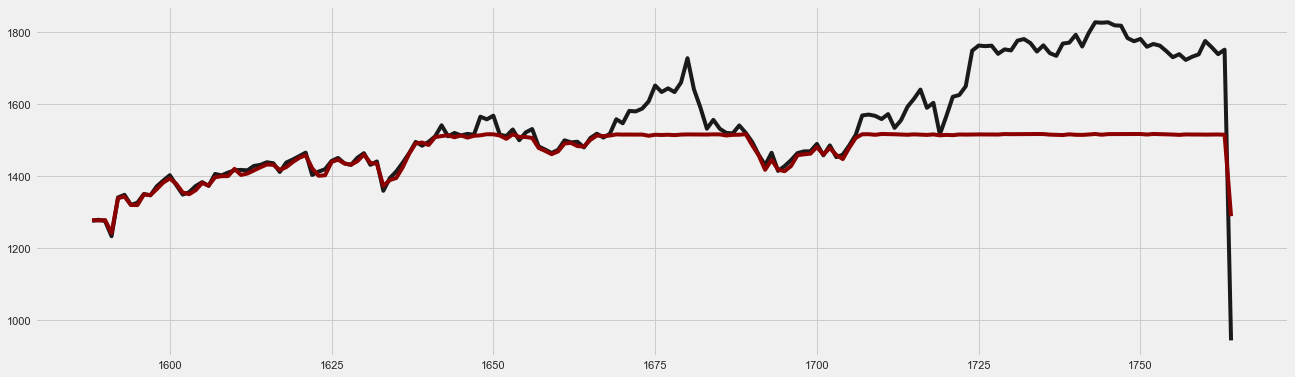

In [76]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20, 6))
plt.plot(val.index, y_val, 'k', label = 'Actuals')
plt.plot(val.index, xgb_pred, 'darkred', label = 'Predicted')
plt.show()

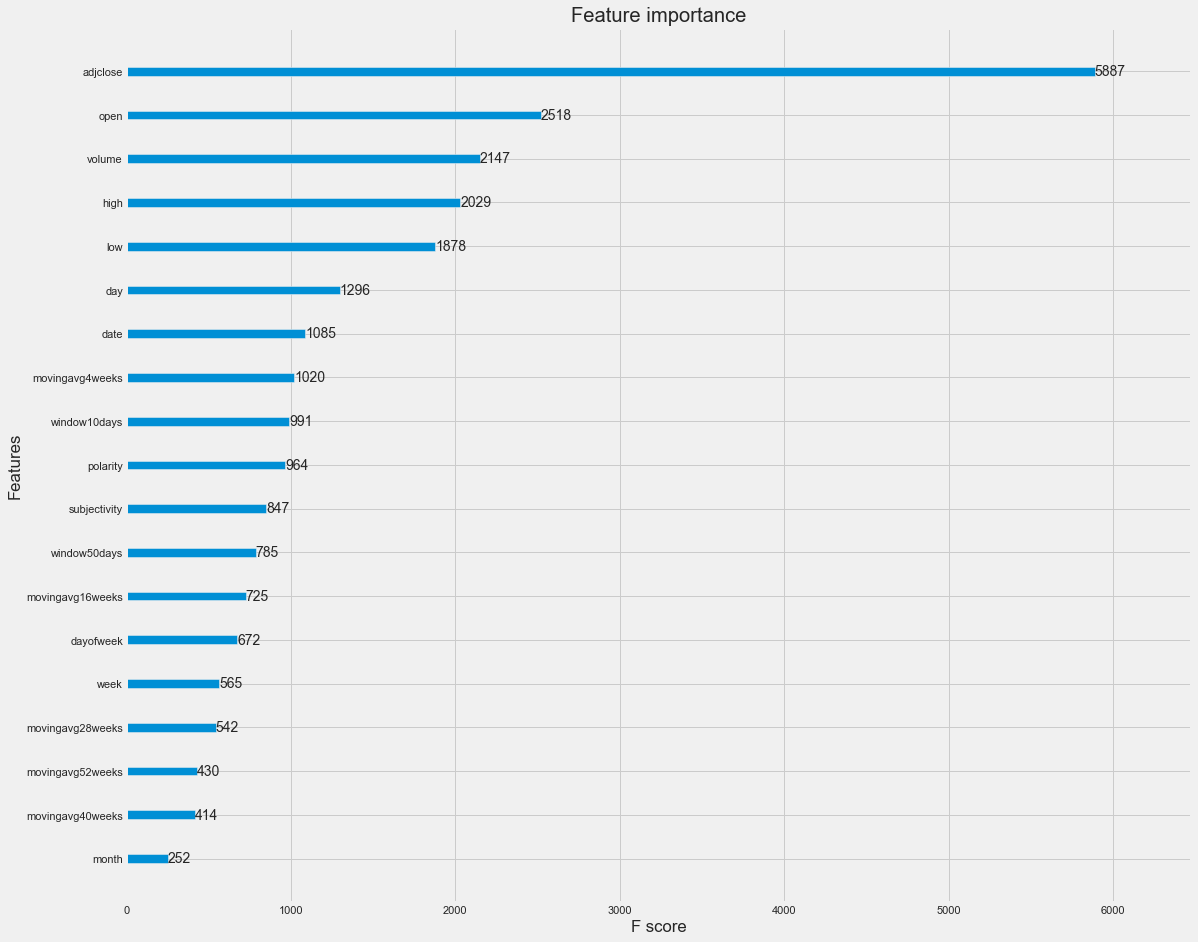

In [77]:
xgb.plot_importance(model)
plt.show()

# Applying ARIMA ALGORITHM

In [219]:
stockdf = stock.copy()

### Splitting into Train and Test

<function matplotlib.pyplot.show(*args, **kw)>

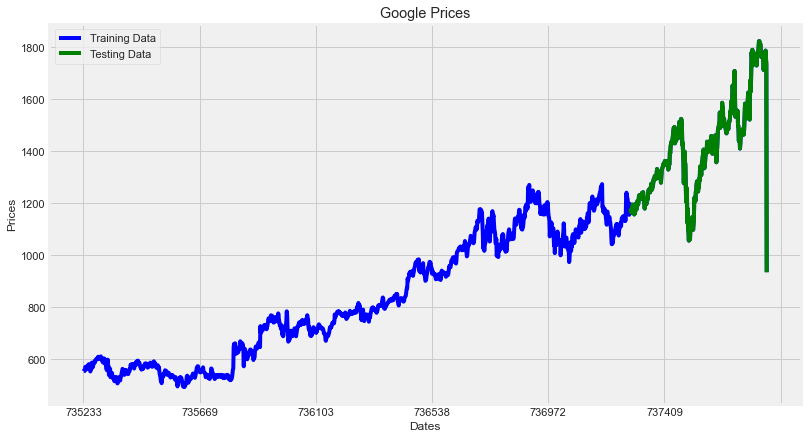

In [233]:
train_data, test_data = stockdf[0:int(len(stockdf)*0.8)], stockdf[int(len(stockdf)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Google Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(stockdf['open'], 'blue', label='Training Data')
plt.plot(test_data['open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), stockdf['date'][0:1857:300])
plt.legend()
plt.show

In [222]:
train_ar = train_data['open'].values
test_ar = test_data['open'].values

In [223]:
def sample_mean(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

## Building Model

In [224]:
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = sample_mean(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 2640.434
Symmetric mean absolute percentage error: 14.555


## Prediction 

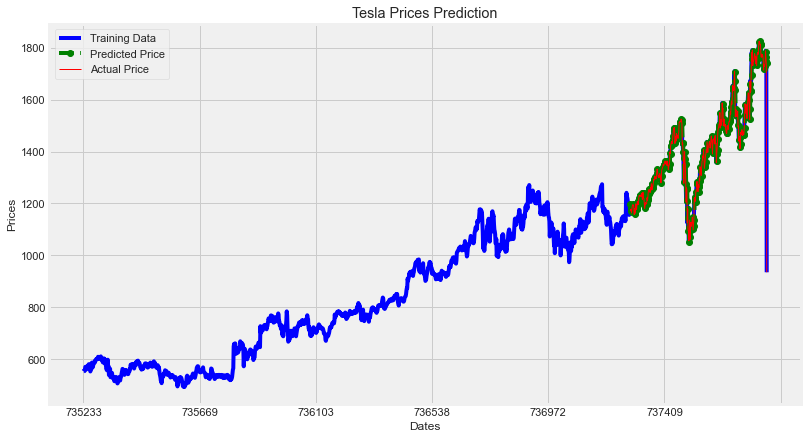

In [232]:
plt.figure(figsize=(12,7))
plt.plot(stockdf['open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price',linewidth=1)
plt.title('Google Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), stockdf['date'][0:1857:300])
plt.legend()

## Forecasting the dataset

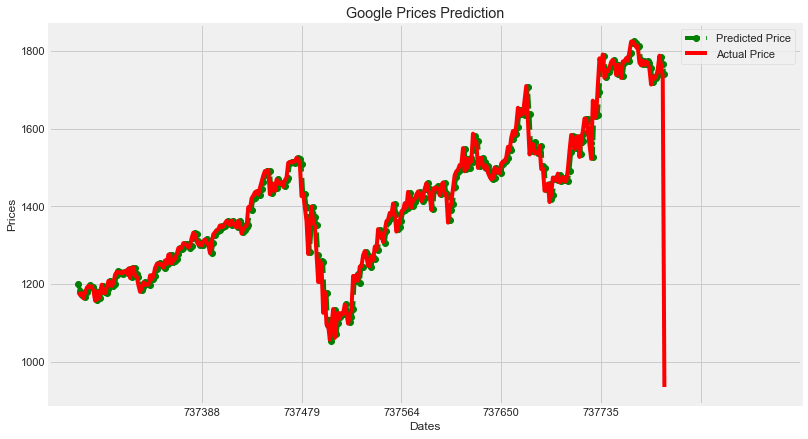

In [234]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), stockdf['date'][1486:1856:60])
plt.title('Google Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()